# example of gradient checking

In [1]:
# gradient checking: compare the analytical gradient with the numerical gradient
# taking the affine layer as an example
from gradient_check import eval_numerical_gradient_array
import numpy as np
from layers import *
np.random.seed(55)
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, M))

# do a forward pass first
out, cache = affine_forward(x, w, b)
# check grad f/grad w, the [0] below gets the output out of the (output, cache) original output
f=lambda w: affine_forward(x, w, b)[0]
# compute the analytical gradient you wrote, [1] get the dw out of the (dx, dw, db) original output
grad = affine_backward(dout, cache)[1]
# compute the numerical gradient using the provided utility function
ngrad = eval_numerical_gradient_array(f, w, dout)
print(grad)
print(ngrad)
# they should be similar enough within some small error tolerance

[[ 0.17848559 -0.08654905 -0.4247721   0.42148769]
 [-0.07843826  0.34782227  0.02674299  0.1348031 ]
 [ 0.44697368 -1.07405563 -0.62114353  0.16984502]]
[[ 0.17848559 -0.08654905 -0.4247721   0.42148769]
 [-0.07843826  0.34782227  0.02674299  0.1348031 ]
 [ 0.44697368 -1.07405563 -0.62114353  0.16984502]]


# example of training a network

In [42]:
# TODO: put the path to your 'hw6_mds189', which should contain a 'trainval' and 'test' directory
path = '/home/wenbo/hw6/hw6_mds189/trainval'
from data_utils import load_mds189
# load the dataset
debug = False  # OPTIONAL: you can change this to True for debugging *only*. Your reported results must be with debug = False
feat_train, label_train, feat_val, label_val = load_mds189(path,debug=False)
from solver import Solver
from classifiers.fc_net import FullyConnectedNet

In [53]:
# problem 2.2
np.random.seed(55)
data = {
      'X_train': feat_train,
      'y_train': label_train,
      'X_val': feat_val,
      'y_val': label_val}

# TODO: fill out the hyperparamets
hyperparams = {'lr_decay': 0.1,
               'num_epochs': 10,
               'batch_size': 100,
               'learning_rate': 10**-4
              }

# TODO: fill out the number of units in your hidden layers
hidden_dim = [10] # this should be a list of units for each hiddent layer

model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
np.random.seed(55)
solver.train()
#solver.loss_history

(Iteration 1 / 360) loss: 291.549635
(Epoch 0 / 10) train acc: 0.106000; val_acc: 0.115833
(Epoch 1 / 10) train acc: 0.367000; val_acc: 0.324167
(Epoch 2 / 10) train acc: 0.333000; val_acc: 0.309167
(Iteration 101 / 360) loss: 4.727040
(Epoch 3 / 10) train acc: 0.342000; val_acc: 0.307500
(Epoch 4 / 10) train acc: 0.358000; val_acc: 0.305000
(Epoch 5 / 10) train acc: 0.362000; val_acc: 0.305000
(Iteration 201 / 360) loss: 5.754842
(Epoch 6 / 10) train acc: 0.306000; val_acc: 0.305000
(Epoch 7 / 10) train acc: 0.339000; val_acc: 0.305000
(Epoch 8 / 10) train acc: 0.367000; val_acc: 0.305000
(Iteration 301 / 360) loss: 5.040225
(Epoch 9 / 10) train acc: 0.319000; val_acc: 0.305000
(Epoch 10 / 10) train acc: 0.349000; val_acc: 0.305000


In [44]:
np.random.seed(55)
accu = []
for i in range(10):
    data = {
          'X_train': feat_train,
          'y_train': label_train,
          'X_val': feat_val,
          'y_val': label_val}

    # TODO: fill out the hyperparamets
    hyperparams = {'lr_decay': 1,
               'num_epochs': 10,
               'batch_size': 100,
               'learning_rate': 10**-i
              }

    # TODO: fill out the number of units in your hidden layers
    hidden_dim = [10] # this should be a list of units for each hiddent layer

    model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
    solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
    np.random.seed(55)
    solver.train()
    accu.append(solver.best_val_acc)

(Iteration 1 / 360) loss: 291.549635
(Epoch 0 / 10) train acc: 0.123000; val_acc: 0.125000
(Epoch 1 / 10) train acc: 0.121000; val_acc: 0.125000
(Epoch 2 / 10) train acc: 0.130000; val_acc: 0.125000
(Iteration 101 / 360) loss: 2.084348
(Epoch 3 / 10) train acc: 0.118000; val_acc: 0.125000
(Epoch 4 / 10) train acc: 0.128000; val_acc: 0.125000
(Epoch 5 / 10) train acc: 0.139000; val_acc: 0.125000
(Iteration 201 / 360) loss: 2.066076
(Epoch 6 / 10) train acc: 0.123000; val_acc: 0.125000
(Epoch 7 / 10) train acc: 0.130000; val_acc: 0.125000
(Epoch 8 / 10) train acc: 0.113000; val_acc: 0.125000
(Iteration 301 / 360) loss: 2.077316
(Epoch 9 / 10) train acc: 0.134000; val_acc: 0.125000
(Epoch 10 / 10) train acc: 0.130000; val_acc: 0.125000
(Iteration 1 / 360) loss: 47.891391
(Epoch 0 / 10) train acc: 0.123000; val_acc: 0.125000
(Epoch 1 / 10) train acc: 0.127000; val_acc: 0.126667
(Epoch 2 / 10) train acc: 0.129000; val_acc: 0.125000


/home/wenbo/hw6/resources/problem2/layers.py:147: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Iteration 101 / 360) loss: 2.079984
(Epoch 3 / 10) train acc: 0.126000; val_acc: 0.125000
(Epoch 4 / 10) train acc: 0.122000; val_acc: 0.125000
(Epoch 5 / 10) train acc: 0.130000; val_acc: 0.125000
(Iteration 201 / 360) loss: 2.080864
(Epoch 6 / 10) train acc: 0.108000; val_acc: 0.125000
(Epoch 7 / 10) train acc: 0.130000; val_acc: 0.125000
(Epoch 8 / 10) train acc: 0.119000; val_acc: 0.125000
(Iteration 301 / 360) loss: 2.079033
(Epoch 9 / 10) train acc: 0.134000; val_acc: 0.125000
(Epoch 10 / 10) train acc: 0.137000; val_acc: 0.125000
(Iteration 1 / 360) loss: 47.891391
(Epoch 0 / 10) train acc: 0.123000; val_acc: 0.125000
(Epoch 1 / 10) train acc: 0.127000; val_acc: 0.126667
(Epoch 2 / 10) train acc: 0.126000; val_acc: 0.128333
(Iteration 101 / 360) loss: 1.935354
(Epoch 3 / 10) train acc: 0.203000; val_acc: 0.190000
(Epoch 4 / 10) train acc: 0.201000; val_acc: 0.201667
(Epoch 5 / 10) train acc: 0.219000; val_acc: 0.198333
(Iteration 201 / 360) loss: 2.080474
(Epoch 6 / 10) train a

4 0.22


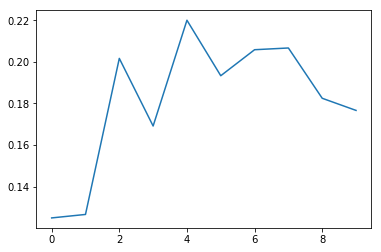

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(10), accu)
print(range(10)[np.argmax(accu)],np.max(accu))

In [46]:
np.random.seed(55)
accu2 = []
for i in range(1,11):
    data = {
          'X_train': feat_train,
          'y_train': label_train,
          'X_val': feat_val,
          'y_val': label_val}

    # TODO: fill out the hyperparamets
    hyperparams = {'lr_decay': 0.1*i,
               'num_epochs': 10,
               'batch_size': 100,
               'learning_rate': 10**-4
              }

    # TODO: fill out the number of units in your hidden layers
    hidden_dim = [10] # this should be a list of units for each hiddent layer

    model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
    solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
    np.random.seed(55)
    solver.train()
    accu2.append(solver.best_val_acc)

(Iteration 1 / 360) loss: 291.549635
(Epoch 0 / 10) train acc: 0.106000; val_acc: 0.115833
(Epoch 1 / 10) train acc: 0.367000; val_acc: 0.324167
(Epoch 2 / 10) train acc: 0.333000; val_acc: 0.309167
(Iteration 101 / 360) loss: 4.727040
(Epoch 3 / 10) train acc: 0.342000; val_acc: 0.307500
(Epoch 4 / 10) train acc: 0.358000; val_acc: 0.305000
(Epoch 5 / 10) train acc: 0.362000; val_acc: 0.305000
(Iteration 201 / 360) loss: 5.754842
(Epoch 6 / 10) train acc: 0.306000; val_acc: 0.305000
(Epoch 7 / 10) train acc: 0.339000; val_acc: 0.305000
(Epoch 8 / 10) train acc: 0.367000; val_acc: 0.305000
(Iteration 301 / 360) loss: 5.040225
(Epoch 9 / 10) train acc: 0.319000; val_acc: 0.305000
(Epoch 10 / 10) train acc: 0.349000; val_acc: 0.305000
(Iteration 1 / 360) loss: 47.891391
(Epoch 0 / 10) train acc: 0.186000; val_acc: 0.220000
(Epoch 1 / 10) train acc: 0.204000; val_acc: 0.202500
(Epoch 2 / 10) train acc: 0.183000; val_acc: 0.197500
(Iteration 101 / 360) loss: 2.950822
(Epoch 3 / 10) train a

1 0.324166666667


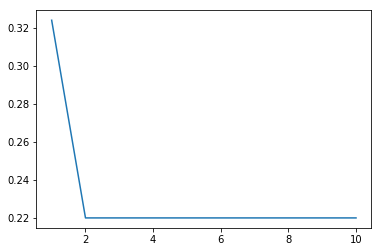

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,11), accu2)
print(range(1,11)[np.argmax(accu2)],np.max(accu2))

In [51]:
np.random.seed(55)
accu3 = []
for i in range(1,12):
    data = {
          'X_train': feat_train,
          'y_train': label_train,
          'X_val': feat_val,
          'y_val': label_val}

    # TODO: fill out the hyperparamets
    hyperparams = {'lr_decay': 0.1,
               'num_epochs': 10,
               'batch_size': 10*i,
               'learning_rate': 10**-4
              }

    # TODO: fill out the number of units in your hidden layers
    hidden_dim = [10] # this should be a list of units for each hiddent layer

    model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
    solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
    np.random.seed(55)
    solver.train()
    accu3.append(solver.best_val_acc)

(Iteration 1 / 3600) loss: 312.144191
(Epoch 0 / 10) train acc: 0.148000; val_acc: 0.141667
(Iteration 101 / 3600) loss: 1.845378
(Iteration 201 / 3600) loss: 1.966831
(Iteration 301 / 3600) loss: 1.853941
(Epoch 1 / 10) train acc: 0.206000; val_acc: 0.187500
(Iteration 401 / 3600) loss: 1.930444
(Iteration 501 / 3600) loss: 1.999430
(Iteration 601 / 3600) loss: 1.923726
(Iteration 701 / 3600) loss: 2.021568
(Epoch 2 / 10) train acc: 0.234000; val_acc: 0.209167
(Iteration 801 / 3600) loss: 2.021518
(Iteration 901 / 3600) loss: 1.669965
(Iteration 1001 / 3600) loss: 1.856470
(Epoch 3 / 10) train acc: 0.224000; val_acc: 0.209167
(Iteration 1101 / 3600) loss: 2.078911
(Iteration 1201 / 3600) loss: 1.827174
(Iteration 1301 / 3600) loss: 1.734806
(Iteration 1401 / 3600) loss: 1.988363
(Epoch 4 / 10) train acc: 0.227000; val_acc: 0.209167
(Iteration 1501 / 3600) loss: 2.017159
(Iteration 1601 / 3600) loss: 1.821333
(Iteration 1701 / 3600) loss: 1.719704
(Epoch 5 / 10) train acc: 0.217000; va

(Epoch 6 / 10) train acc: 0.182000; val_acc: 0.186667
(Iteration 301 / 450) loss: 2.435051
(Epoch 7 / 10) train acc: 0.194000; val_acc: 0.186667
(Epoch 8 / 10) train acc: 0.184000; val_acc: 0.186667
(Iteration 401 / 450) loss: 2.027385
(Epoch 9 / 10) train acc: 0.173000; val_acc: 0.186667
(Epoch 10 / 10) train acc: 0.190000; val_acc: 0.186667
(Iteration 1 / 400) loss: 48.950434
(Epoch 0 / 10) train acc: 0.187000; val_acc: 0.213333
(Epoch 1 / 10) train acc: 0.198000; val_acc: 0.198333
(Epoch 2 / 10) train acc: 0.181000; val_acc: 0.197500
(Iteration 101 / 400) loss: 2.434427
(Epoch 3 / 10) train acc: 0.186000; val_acc: 0.196667
(Epoch 4 / 10) train acc: 0.171000; val_acc: 0.196667
(Epoch 5 / 10) train acc: 0.191000; val_acc: 0.196667
(Iteration 201 / 400) loss: 2.764924
(Epoch 6 / 10) train acc: 0.166000; val_acc: 0.196667
(Epoch 7 / 10) train acc: 0.195000; val_acc: 0.196667
(Iteration 301 / 400) loss: 3.221483
(Epoch 8 / 10) train acc: 0.178000; val_acc: 0.196667
(Epoch 9 / 10) train a

10 0.22


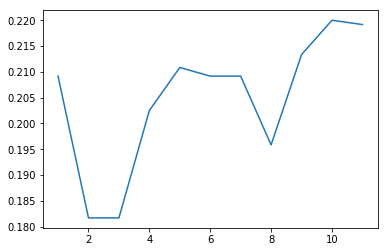

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,12), accu3)
print(range(1,12)[np.argmax(accu3)],np.max(accu3))

In [59]:
#problem 2.3
hidden_dim1 = [10]
hidden_dim2 = [10,10]
hidden_dim3 = [10,10,10]
hidden_dim4 = [10,10,10,10]

hidden_dims = {'h1':hidden_dim1,
              'h2':hidden_dim2,
              'h3':hidden_dim3,
              'h4':hidden_dim4}

In [82]:
np.random.seed(55)
accu4 = []
data = {
      'X_train': feat_train,
      'y_train': label_train,
      'X_val': feat_val,
      'y_val': label_val}

# TODO: fill out the hyperparamets
hyperparams = {'lr_decay': 1,
               'num_epochs': 100,
               'batch_size': 100,
               'learning_rate': 0.001 
              }

# TODO: fill out the number of units in your hidden layers
# this should be a list of units for each hiddent layer

for i in range(4):
    hidden_dim = hidden_dims['h%d'%(i+1)]

    model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
    solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
    np.random.seed(55)
    solver.train()
    accu4.append(solver.best_val_acc)

(Iteration 1 / 3600) loss: 291.549635
(Epoch 0 / 100) train acc: 0.106000; val_acc: 0.125000
(Epoch 1 / 100) train acc: 0.126000; val_acc: 0.124167
(Epoch 2 / 100) train acc: 0.127000; val_acc: 0.124167
(Iteration 101 / 3600) loss: 2.079445
(Epoch 3 / 100) train acc: 0.126000; val_acc: 0.124167
(Epoch 4 / 100) train acc: 0.115000; val_acc: 0.124167
(Epoch 5 / 100) train acc: 0.130000; val_acc: 0.124167
(Iteration 201 / 3600) loss: 2.058717
(Epoch 6 / 100) train acc: 0.109000; val_acc: 0.124167
(Epoch 7 / 100) train acc: 0.126000; val_acc: 0.124167
(Epoch 8 / 100) train acc: 0.124000; val_acc: 0.124167
(Iteration 301 / 3600) loss: 2.079361
(Epoch 9 / 100) train acc: 0.131000; val_acc: 0.124167
(Epoch 10 / 100) train acc: 0.116000; val_acc: 0.124167
(Epoch 11 / 100) train acc: 0.130000; val_acc: 0.124167
(Iteration 401 / 3600) loss: 2.079506
(Epoch 12 / 100) train acc: 0.129000; val_acc: 0.124167
(Epoch 13 / 100) train acc: 0.115000; val_acc: 0.124167
(Iteration 501 / 3600) loss: 2.07940

(Epoch 21 / 100) train acc: 0.249000; val_acc: 0.245000
(Epoch 22 / 100) train acc: 0.244000; val_acc: 0.245000
(Iteration 801 / 3600) loss: 1.805670
(Epoch 23 / 100) train acc: 0.250000; val_acc: 0.240833
(Epoch 24 / 100) train acc: 0.251000; val_acc: 0.246667
(Epoch 25 / 100) train acc: 0.245000; val_acc: 0.229167
(Iteration 901 / 3600) loss: 1.763326
(Epoch 26 / 100) train acc: 0.254000; val_acc: 0.245000
(Epoch 27 / 100) train acc: 0.244000; val_acc: 0.245000
(Iteration 1001 / 3600) loss: 1.739349
(Epoch 28 / 100) train acc: 0.240000; val_acc: 0.245000
(Epoch 29 / 100) train acc: 0.243000; val_acc: 0.248333
(Epoch 30 / 100) train acc: 0.234000; val_acc: 0.246667
(Iteration 1101 / 3600) loss: 1.743545
(Epoch 31 / 100) train acc: 0.261000; val_acc: 0.252500
(Epoch 32 / 100) train acc: 0.242000; val_acc: 0.246667
(Epoch 33 / 100) train acc: 0.238000; val_acc: 0.248333
(Iteration 1201 / 3600) loss: 1.856513
(Epoch 34 / 100) train acc: 0.249000; val_acc: 0.250000
(Epoch 35 / 100) train 

(Iteration 1501 / 3600) loss: 0.644045
(Epoch 42 / 100) train acc: 0.730000; val_acc: 0.730000
(Epoch 43 / 100) train acc: 0.742000; val_acc: 0.725833
(Epoch 44 / 100) train acc: 0.766000; val_acc: 0.732500
(Iteration 1601 / 3600) loss: 0.753686
(Epoch 45 / 100) train acc: 0.781000; val_acc: 0.741667
(Epoch 46 / 100) train acc: 0.782000; val_acc: 0.740000
(Epoch 47 / 100) train acc: 0.770000; val_acc: 0.765833
(Iteration 1701 / 3600) loss: 0.806821
(Epoch 48 / 100) train acc: 0.808000; val_acc: 0.770000
(Epoch 49 / 100) train acc: 0.770000; val_acc: 0.760833
(Epoch 50 / 100) train acc: 0.750000; val_acc: 0.736667
(Iteration 1801 / 3600) loss: 0.538316
(Epoch 51 / 100) train acc: 0.761000; val_acc: 0.747500
(Epoch 52 / 100) train acc: 0.783000; val_acc: 0.772500
(Iteration 1901 / 3600) loss: 0.672998
(Epoch 53 / 100) train acc: 0.800000; val_acc: 0.778333
(Epoch 54 / 100) train acc: 0.800000; val_acc: 0.762500
(Epoch 55 / 100) train acc: 0.790000; val_acc: 0.768333
(Iteration 2001 / 360

(Epoch 60 / 100) train acc: 0.751000; val_acc: 0.735000
(Epoch 61 / 100) train acc: 0.786000; val_acc: 0.757500
(Iteration 2201 / 3600) loss: 0.679320
(Epoch 62 / 100) train acc: 0.788000; val_acc: 0.765000
(Epoch 63 / 100) train acc: 0.796000; val_acc: 0.786667
(Iteration 2301 / 3600) loss: 0.761620
(Epoch 64 / 100) train acc: 0.805000; val_acc: 0.770833
(Epoch 65 / 100) train acc: 0.789000; val_acc: 0.767500
(Epoch 66 / 100) train acc: 0.816000; val_acc: 0.787500
(Iteration 2401 / 3600) loss: 0.652751
(Epoch 67 / 100) train acc: 0.809000; val_acc: 0.763333
(Epoch 68 / 100) train acc: 0.801000; val_acc: 0.740833
(Epoch 69 / 100) train acc: 0.784000; val_acc: 0.785833
(Iteration 2501 / 3600) loss: 0.489437
(Epoch 70 / 100) train acc: 0.826000; val_acc: 0.770000
(Epoch 71 / 100) train acc: 0.805000; val_acc: 0.761667
(Epoch 72 / 100) train acc: 0.770000; val_acc: 0.759167
(Iteration 2601 / 3600) loss: 0.610557
(Epoch 73 / 100) train acc: 0.783000; val_acc: 0.775833
(Epoch 74 / 100) trai

3 0.839166666667


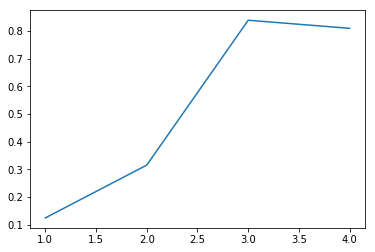

In [83]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,5), accu4)
print(range(1,5)[np.argmax(accu4)],np.max(accu4))

In [91]:
hidden_dim1 = [10,10,5]
hidden_dim2 = [10,10,10]
hidden_dim3 = [20,10,5]
hidden_dim4 = [20,20,10]
hidden_dim5 = [20,20,20]

hidden_dims = {'h1':hidden_dim1,
              'h2':hidden_dim2,
              'h3':hidden_dim3,
              'h4':hidden_dim4,
              'h5':hidden_dim5}

In [92]:
np.random.seed(55)
accu5 = []
data = {
      'X_train': feat_train,
      'y_train': label_train,
      'X_val': feat_val,
      'y_val': label_val}

# TODO: fill out the hyperparamets
hyperparams = {'lr_decay': 1,
               'num_epochs': 100,
               'batch_size': 100,
               'learning_rate': 0.001 
              }

# TODO: fill out the number of units in your hidden layers
# this should be a list of units for each hiddent layer

for i in range(5):
    hidden_dim = hidden_dims['h%d'%(i+1)]

    model = FullyConnectedNet(input_dim=75,
                          hidden_dim=hidden_dim)
    solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=100)
    np.random.seed(55)
    solver.train()
    accu5.append(solver.best_val_acc)

(Iteration 1 / 3600) loss: 10.488189
(Epoch 0 / 100) train acc: 0.134000; val_acc: 0.125833
(Epoch 1 / 100) train acc: 0.188000; val_acc: 0.170833
(Epoch 2 / 100) train acc: 0.237000; val_acc: 0.243333
(Iteration 101 / 3600) loss: 1.850281
(Epoch 3 / 100) train acc: 0.325000; val_acc: 0.316667
(Epoch 4 / 100) train acc: 0.323000; val_acc: 0.323333
(Epoch 5 / 100) train acc: 0.447000; val_acc: 0.414167
(Iteration 201 / 3600) loss: 1.684501
(Epoch 6 / 100) train acc: 0.349000; val_acc: 0.351667
(Epoch 7 / 100) train acc: 0.338000; val_acc: 0.345833
(Epoch 8 / 100) train acc: 0.406000; val_acc: 0.407500
(Iteration 301 / 3600) loss: 1.655931
(Epoch 9 / 100) train acc: 0.418000; val_acc: 0.404167
(Epoch 10 / 100) train acc: 0.383000; val_acc: 0.398333
(Epoch 11 / 100) train acc: 0.444000; val_acc: 0.433333
(Iteration 401 / 3600) loss: 1.554860
(Epoch 12 / 100) train acc: 0.486000; val_acc: 0.484167
(Epoch 13 / 100) train acc: 0.505000; val_acc: 0.463333
(Iteration 501 / 3600) loss: 1.394536

(Iteration 601 / 3600) loss: 1.112292
(Epoch 17 / 100) train acc: 0.621000; val_acc: 0.589167
(Epoch 18 / 100) train acc: 0.602000; val_acc: 0.563333
(Epoch 19 / 100) train acc: 0.628000; val_acc: 0.601667
(Iteration 701 / 3600) loss: 0.848904
(Epoch 20 / 100) train acc: 0.629000; val_acc: 0.622500
(Epoch 21 / 100) train acc: 0.643000; val_acc: 0.618333
(Epoch 22 / 100) train acc: 0.677000; val_acc: 0.634167
(Iteration 801 / 3600) loss: 0.692289
(Epoch 23 / 100) train acc: 0.623000; val_acc: 0.615833
(Epoch 24 / 100) train acc: 0.640000; val_acc: 0.630000
(Epoch 25 / 100) train acc: 0.648000; val_acc: 0.613333
(Iteration 901 / 3600) loss: 0.880185
(Epoch 26 / 100) train acc: 0.642000; val_acc: 0.658333
(Epoch 27 / 100) train acc: 0.660000; val_acc: 0.672500
(Iteration 1001 / 3600) loss: 0.817829
(Epoch 28 / 100) train acc: 0.684000; val_acc: 0.662500
(Epoch 29 / 100) train acc: 0.675000; val_acc: 0.665000
(Epoch 30 / 100) train acc: 0.653000; val_acc: 0.662500
(Iteration 1101 / 3600) l

(Epoch 40 / 100) train acc: 0.538000; val_acc: 0.540000
(Epoch 41 / 100) train acc: 0.521000; val_acc: 0.505000
(Iteration 1501 / 3600) loss: 1.219697
(Epoch 42 / 100) train acc: 0.561000; val_acc: 0.533333
(Epoch 43 / 100) train acc: 0.514000; val_acc: 0.512500
(Epoch 44 / 100) train acc: 0.571000; val_acc: 0.540000
(Iteration 1601 / 3600) loss: 1.381749
(Epoch 45 / 100) train acc: 0.578000; val_acc: 0.560000
(Epoch 46 / 100) train acc: 0.576000; val_acc: 0.559167
(Epoch 47 / 100) train acc: 0.565000; val_acc: 0.550833
(Iteration 1701 / 3600) loss: 1.261394
(Epoch 48 / 100) train acc: 0.596000; val_acc: 0.565833
(Epoch 49 / 100) train acc: 0.562000; val_acc: 0.572500
(Epoch 50 / 100) train acc: 0.600000; val_acc: 0.570833
(Iteration 1801 / 3600) loss: 1.119292
(Epoch 51 / 100) train acc: 0.483000; val_acc: 0.514167
(Epoch 52 / 100) train acc: 0.561000; val_acc: 0.533333
(Iteration 1901 / 3600) loss: 1.205870
(Epoch 53 / 100) train acc: 0.603000; val_acc: 0.579167
(Epoch 54 / 100) trai

(Epoch 57 / 100) train acc: 0.898000; val_acc: 0.878333
(Epoch 58 / 100) train acc: 0.915000; val_acc: 0.885833
(Iteration 2101 / 3600) loss: 0.353443
(Epoch 59 / 100) train acc: 0.879000; val_acc: 0.860000
(Epoch 60 / 100) train acc: 0.904000; val_acc: 0.877500
(Epoch 61 / 100) train acc: 0.883000; val_acc: 0.870833
(Iteration 2201 / 3600) loss: 0.391708
(Epoch 62 / 100) train acc: 0.902000; val_acc: 0.876667
(Epoch 63 / 100) train acc: 0.890000; val_acc: 0.879167
(Iteration 2301 / 3600) loss: 0.497693
(Epoch 64 / 100) train acc: 0.901000; val_acc: 0.887500
(Epoch 65 / 100) train acc: 0.903000; val_acc: 0.880833
(Epoch 66 / 100) train acc: 0.913000; val_acc: 0.874167
(Iteration 2401 / 3600) loss: 0.558116
(Epoch 67 / 100) train acc: 0.912000; val_acc: 0.889167
(Epoch 68 / 100) train acc: 0.914000; val_acc: 0.880833
(Epoch 69 / 100) train acc: 0.913000; val_acc: 0.890833
(Iteration 2501 / 3600) loss: 0.336330
(Epoch 70 / 100) train acc: 0.908000; val_acc: 0.887500
(Epoch 71 / 100) trai

(Epoch 74 / 100) train acc: 0.944000; val_acc: 0.885833
(Epoch 75 / 100) train acc: 0.942000; val_acc: 0.897500
(Iteration 2701 / 3600) loss: 0.232356
(Epoch 76 / 100) train acc: 0.923000; val_acc: 0.895833
(Epoch 77 / 100) train acc: 0.936000; val_acc: 0.899167
(Iteration 2801 / 3600) loss: 0.167208
(Epoch 78 / 100) train acc: 0.933000; val_acc: 0.890000
(Epoch 79 / 100) train acc: 0.939000; val_acc: 0.900000
(Epoch 80 / 100) train acc: 0.937000; val_acc: 0.890000
(Iteration 2901 / 3600) loss: 0.105098
(Epoch 81 / 100) train acc: 0.936000; val_acc: 0.906667
(Epoch 82 / 100) train acc: 0.933000; val_acc: 0.893333
(Epoch 83 / 100) train acc: 0.931000; val_acc: 0.894167
(Iteration 3001 / 3600) loss: 0.285609
(Epoch 84 / 100) train acc: 0.942000; val_acc: 0.897500
(Epoch 85 / 100) train acc: 0.935000; val_acc: 0.897500
(Epoch 86 / 100) train acc: 0.959000; val_acc: 0.901667
(Iteration 3101 / 3600) loss: 0.225823
(Epoch 87 / 100) train acc: 0.948000; val_acc: 0.891667
(Epoch 88 / 100) trai

5 0.906666666667


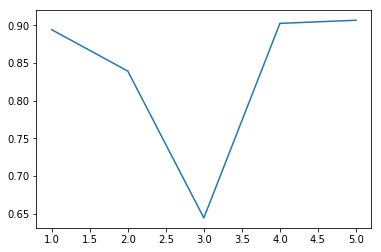

In [93]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,6), accu5)
print(range(1,6)[np.argmax(accu5)],np.max(accu5))